This project aims to identify fraudulent credit card transactions using machine learning. The data is obtained from Kaggle (<a href='https://www.kaggle.com/mlg-ulb/creditcardfraud' target='_blank'>link</a>). This project will compare the performance of four different classifiers in how well they detect fraud and look at how to handle imbalanced data.

References:
 - <a href="https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets" target="_blank">Credit Fraud || Dealing with Imbalanced Datasets</a> by Janio Martinez
 - <a href="https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50" target="_blank">Credit Card Fraud Detection in Python using Scikit Learn</a>
 - <a href="https://towardsdatascience.com/understanding-neural-networks-19020b758230
 " target="_blank">Understanding Neural Networks</a>


To begin, the important python modules are imported into the notebook.

## Introduction :


This notebook is realized as part of my self-training as an engineering student at Ecole Centrale Casablanca.

Before we start, we would like to follow a very rigorous process for any Data science project, and that's why We will try to follow the Cross Industry Standard Process for Data Mining.




The data available for this task is the product of the application of the PCA technique on the original data set.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cc_data = pd.read_csv("creditcard.csv")

cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Summary

Below it is seen that there are 31 columns. The **Time**  column shows how much time eleapsed between transactions, **V1** to **V28** show the principal components of transactions, **Amount** shows how much money was spent per transaction and **Class** is a variable that indicates whether a transaction is valid or fraudulent with fradulent transactions having a value of 1 and valid transactions having a value of 0. As shown below the mean amount spent per transaction is low at around 88 US$. As columns **V1** to **V28** have already been scaled, for uniformity purposes, **Amount** and **Time** should be scaled to. This scaling is done below.

In [4]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284793.000000,284807.000000
mean,94811.37406,3.921257e-15,5.620302e-16,-8.769071e-15,2.795086e-15,-1.545879e-15,2.005824e-15,-1.695445e-15,-1.849189e-16,-3.130319e-15,...,1.554056e-16,7.860739e-16,5.128149e-16,4.464203e-15,1.422651e-15,1.701391e-15,-3.656753e-16,-1.183752e-16,88.351304,0.001727
std,47489.85436,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.124399,0.041527
min,-416.00000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.00000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84690.00000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.00000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.170000,0.000000
max,172792.00000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
cc_data.shape

(284807, 31)

## Data Preparation 

We can see that the **Amount** and **Time** columns are columns with non-normalized values. 
Thanks to RobustScaler we can change the scale of these two columns and make them into values belonging to the domain [-1,1].

In [6]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

cc_data['Amount_Scaled'] = rob_scaler.fit_transform(cc_data['Amount'].values.reshape(-1,1))
cc_data['Time_Scaled_'] = rob_scaler.fit_transform(cc_data['Time'].values.reshape(-1,1))

cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Time_Scaled_
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783149,-0.994960
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269806,-0.994960
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983373,-0.994948
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418192,-0.994948
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670532,-0.994937


Below the proportions of fraud versus valid cases is shown. The fraud cases make up 0.17% of the data which shows that the data is imbalanced. This means that by using this data as is the model is prone to overfitting as there are nearly 100 non-fraud transactions for every fraudulent transaction. It can be seen from the correlation matrix below that it is not clear which elements have an influence on the class of the transaction.

In [7]:
fraud = cc_data[cc_data['Class'] == 1] 
valid = cc_data[cc_data['Class'] == 0] 
 
print('Number of Fraud Cases: {}'.format(len(cc_data[cc_data['Class'] == 1]))) 
print('Number of Valid Transactions: {}'.format(len(cc_data[cc_data['Class'] == 0])))

Number of Fraud Cases: 492
Number of Valid Transactions: 284315


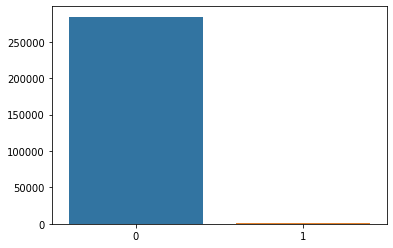

In [31]:
y = cc_data["Class"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

Most of the transactions are not fraudulent, and only 0.17% of the dataset is fraudulent.

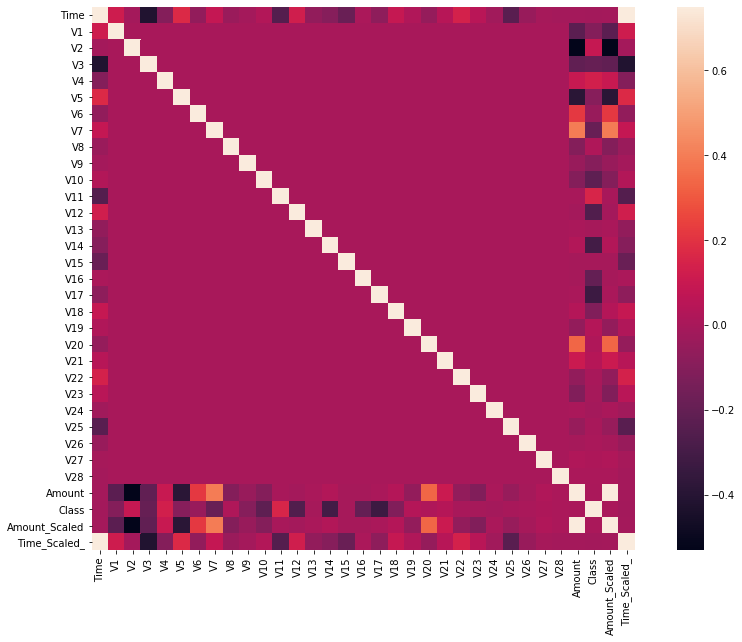

In [8]:
corrmat = cc_data.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(corrmat, vmax = .75, square = True)
plt.show()

To deal with the imbalanced data and skew this creates, a sub-sample of the data is created. This subsample will be a dataframe that contains equal ratio of fraud to non-fraud cases. To create this sub=sample, we need to randomly select 492 non-fraud cases to match the 492 fraud cases we do have. To confirm that the number of cases are equal we check the value counts of the new dataframe.

In [9]:
data = cc_data.sample(frac=1).fillna(0)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

data1 = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = data1.sample(frac=1, random_state=42)

new_data.drop(['Time','Amount'], axis=1, inplace=True)

new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled_
169960,-10.482762,1.306719,-5.148423,-2.169215,-7.708831,-0.512811,-3.889624,5.419595,-1.412040,1.045165,...,-0.359557,-1.761915,0.011398,0.860199,-0.083708,0.096030,-0.292960,0,1.825486,0.414232
154234,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,-19.836149,...,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1,-0.293419,0.190721
250350,1.856387,-0.903993,0.290946,-0.103186,-1.383312,-0.333928,-1.070890,0.037212,1.529601,-0.173433,...,0.776506,0.219020,0.099593,-0.711843,1.239412,-0.046151,-0.031844,0,0.690932,0.824352
263877,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,-7.509557,...,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,1,-0.302082,0.898319
42549,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,-6.167234,-11.435624,...,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1,0.925388,-0.511554


In [10]:
print(new_data['Class'].value_counts())

1    492
0    492
Name: Class, dtype: int64


The next step is to split the data into train and test sets. This is done by setting the **Class** column as the target column and specifying the size of the test data which is this case is 20% of the data in the dataframe.

In [11]:
X=new_data.drop(['Class'], axis=1)
Y=new_data["Class"]

X_data=X.values
Y_data=Y.values

In [28]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Horn's Parallel Analysis

We chosed to reduce the numbre of features throught the parallel analysis method. \
Parallel analysis, also known as Horn's parallel analysis, is a statistical method used to determine the number of components to keep in a principal component analysis or factors to keep in an exploratory factor analysis.


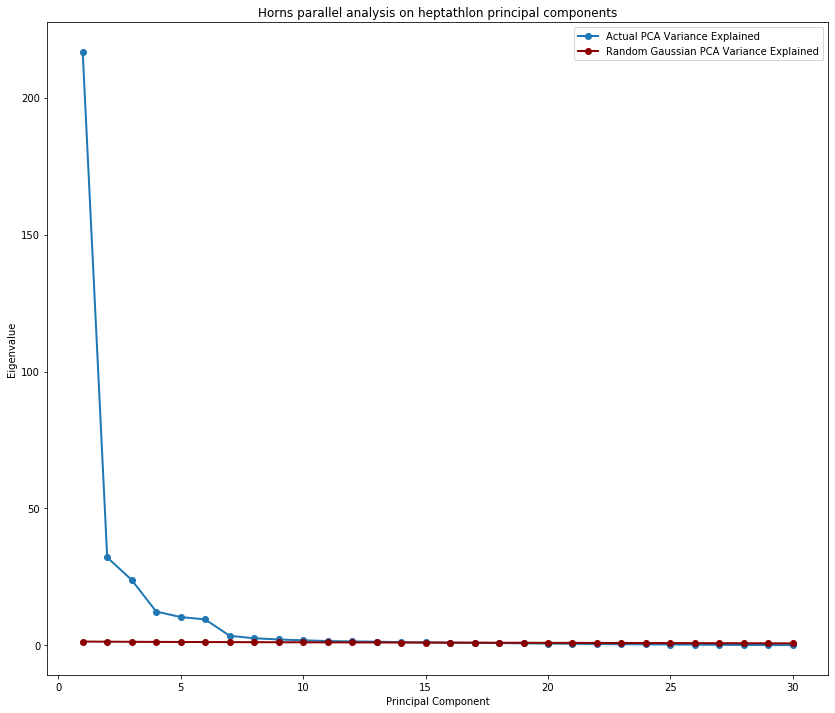

In [29]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

hep_pa = horn_parallel_analysis(X.shape, percentile=95)

fig, ax = plt.subplots(figsize=(14,12))

ax.plot(range(1, X.shape[1]+1), pca.explained_variance_, lw=2, marker='o')
ax.plot(range(1, X.shape[1]+1), hep_pa, lw=2, color='darkred', marker='o')
ax.set_title("Horns parallel analysis on heptathlon principal components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Eigenvalue")

plt.legend(['Actual PCA Variance Explained', "Random Gaussian PCA Variance Explained"])


We will take the components that have eigenvalues above the Gaussian random PCA plot.


Number of components: 30

We notice that the number of feature used is the optimal number for the realization of the predictions.\
No reduction in the number of features is possible.


## Background :

After preparing the data, we will begin the part of the models used for the exploitation of the data.

First, we start with a rather theoretical documentation of the models used in the prediction of which transaction is fraudulent.




## Logistic regression
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

It's a method which uses as a cost function the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.

Let $Y$ be the variable to be predicted  and $X = (X_1, X_2, ..., X_J)$ the predictive variables.

In binary logistic regression, the variable $Y$ takes two possible modalities $\{1, 0\}$. Variables $X_j$ are exclusively continuous or binary.  (continuous in our case).
* Let $\Omega$ be a set of $n$ samples, comprising $n_1$(resp. $n_0$) observations corresponding to the $1$(resp. $0$) modality of $Y$.
*  $P(Y=1)$ (resp. $P(Y=0)$) is the  probability that$Y=1$(resp. $Y=0$). For simplicity, this will then be denoted as $p(1)$ (resp. $p(0)$).
* $p(X \vert 1)$(resp.$p(X\vert 0)$) is the conditional distribution of $X$ knowing the value taken by $Y$.
* The a posteriori probability of obtaining the $1$ modality of $Y$ (resp. $0$) knowing the value taken by $X$ is noted $p(1\vert X)$ (resp. $p(0 \vert X)$).



In order to keep the outcome between 0 and 1, we apply the logistic function (also called sigmoid function):
$g(z) = \frac{1}{1 + exp(-z)}$

The logistic regression hypothesis is then defined as:
$h_\beta(x) = g(\beta^T x)$

Logistic regressions are usually fit by maximum likelihood. The cost function we want to minimize is the opposite of the log-likelihood function:
$J(\beta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\beta (x_i) – (1 – y_i) log(1-h_\beta (x_i))]$

This imply to solve the following equation:
$\frac{dJ(\beta)}{d\beta} = \frac{1}{m} \sum_{i=1}^Nx_i(h_\beta(x_i)-y_i) = 0$


In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In the cell below, we import the models we intend to use. For this project we shall compare the performance of the Logistic Regression, Gaussian Naive Bayes, Random Forest and KNearest Neighbours classifiers. We also import the metrics to assess the model performance. 

In [13]:
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [33]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=500)

lr_model.fit(X_train, Y_train)
lr_y_pred = lr_model.predict(X_test)

lr_acc=accuracy_score(Y_test,lr_y_pred)
print(f'Accuracy is {(lr_acc)}')
lr_roc_auc=roc_auc_score(Y_test,lr_y_pred)
print(f'The ROC-AUC is {(lr_roc_auc)}')
lr_prec= precision_score(Y_test,lr_y_pred)
print(f"The precision is {(lr_prec)}")
lr_rec= recall_score(Y_test,lr_y_pred)
print(f"The recall is {(lr_rec)}")
lr_f1= f1_score(Y_test,lr_y_pred)
print(f"The F1-Score is {(lr_f1)}")
lr_MCC=matthews_corrcoef(Y_test,lr_y_pred)
print(f"The Matthews correlation coefficient is {(lr_MCC)}")

Accuracy is 0.9390862944162437
The ROC-AUC is 0.9430512016718914
The precision is 0.9803921568627451
The recall is 0.9090909090909091
The F1-Score is 0.9433962264150944
The Matthews correlation coefficient is 0.8805986084598311


## Gaussian naive Bayes
The probabilistic model for a classifier is the conditional model : $P(C \vert F_1,\dots,F_n)\,$

where $C $ is a dependent class variable with few instances or ''classes'', conditioned by several characteristic variables {$F_1,F_2 \ldots F_n$}

When the number of characteristics $n$ is large, or when these characteristics can take a large number of values, basing this model on probability tables becomes impossible. 

Using Bayes' theorem, we write: $P(C \vert F_1,\dots,F_n) = \frac{P(C) \ P(F_1,\dots,F_n\vert C)}{P(F_1,\dots,F_n)}. \,$




In [15]:
#Gaussian Naive Bayes
gau_model = GaussianNB()

gau_model.fit(X_train, Y_train)
gau_y_pred = gau_model.predict(X_test)

gau_acc=accuracy_score(Y_test,gau_y_pred)
print(f'Accuracy is {(gau_acc)}')
gau_roc_auc=roc_auc_score(Y_test,gau_y_pred)
print(f'The ROC_AUC score is {(gau_acc)}')
gau_prec= precision_score(Y_test,gau_y_pred)
print(f"The precision is {(gau_prec)}")
gau_rec= recall_score(Y_test,gau_y_pred)
print(f"The recall is {(gau_rec)}")
gau_f1= f1_score(Y_test,gau_y_pred)
print(f"The F1-Score is {(gau_f1)}")
gau_MCC=matthews_corrcoef(Y_test,gau_y_pred)
print(f"The Matthews correlation coefficient is {(gau_MCC)}")

Accuracy is 0.9086294416243654
The ROC_AUC score is 0.9086294416243654
The precision is 0.9791666666666666
The recall is 0.8545454545454545
The F1-Score is 0.912621359223301
The Matthews correlation coefficient is 0.8261362186887347


## Random forest : 

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences.



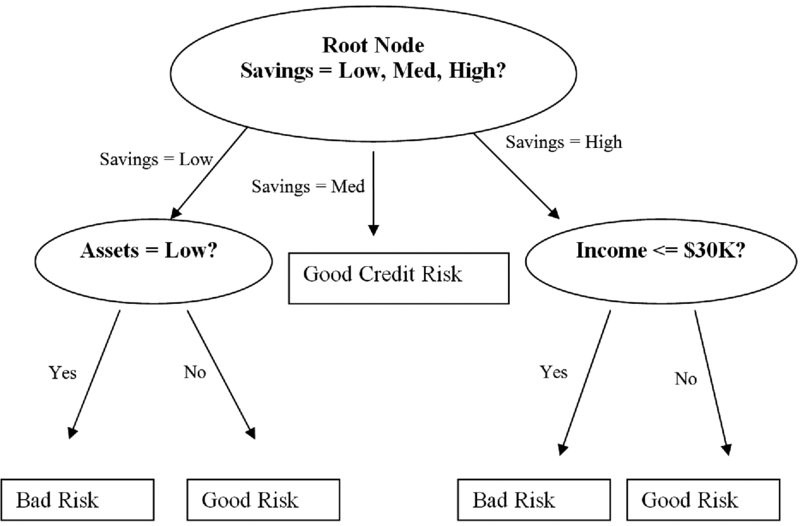

Bagging or bootstrap aggregation is a technique for reducing
the variance of an estimated prediction function. Bagging seems to be working
particularly good for high variability and low bias methods, such as trees.

Thanks to the notion of bagging, it is possible to build a model of a random drill by grouping together a large number of decision trees.


In [16]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

rfc_y_pred = rfc.predict(X_test)

rfc_acc=accuracy_score(Y_test,rfc_y_pred)
print(f'Accuracy is {(rfc_acc)}')
rfc_roc_auc=roc_auc_score(Y_test,rfc_y_pred)
print(f'The ROC-AUC score is {(rfc_roc_auc)}')
rfc_prec= precision_score(Y_test,rfc_y_pred)
print(f"The precision is {(rfc_prec)}")
rfc_rec= recall_score(Y_test,rfc_y_pred)
print(f"The recall is {(rfc_rec)}")
rfc_f1= f1_score(Y_test,rfc_y_pred)
print(f"The F1-Score is {(rfc_f1)}")
rfc_MCC=matthews_corrcoef(Y_test,rfc_y_pred)
print(f"The Matthews correlation coefficient is {(rfc_MCC)}")

Accuracy is 0.949238578680203
The ROC-AUC score is 0.9545454545454546
The precision is 1.0
The recall is 0.9090909090909091
The F1-Score is 0.9523809523809523
The Matthews correlation coefficient is 0.9029785140375688


## K nearest neighbours :

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

Suppose we have pairs $(X_1,Y_1), (X_2,Y_2), \dots, (X_n, Y_n)$ taking values in $\mathbb{R}^d \times \{1,2\}$, where $Y$ is the class label of $ X$ , so that $X|Y=r \sim P_r $ for $r=1,2$ (and probability distributions $P_r$). Given some norm $\|\cdot\|$ on $\mathbb{R}^d$ and a point $x \in \mathbb{R}^d$, let $(X_{(1)},Y_{(1)}), \dots, (X_{(n)}, Y_{(n)}) $ be a reordering of the training data such that $ \|X_{(1)}-x\| \leq \dots \leq \|X_{(n)}-x\| $


In [17]:
#KNearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

knn_y_pred = knn.predict(X_test)

knn_acc=accuracy_score(Y_test,knn_y_pred)
print(f'The accuracy is {(knn_acc)}')
knn_roc_auc=roc_auc_score(Y_test,knn_y_pred)
print(f'The ROC-AUC score is {(knn_roc_auc)}')
knn_prec= precision_score(Y_test,knn_y_pred)
print(f"The precision is {(knn_prec)}")
knn_rec= recall_score(Y_test,knn_y_pred)
print(f"The recall is {(knn_rec)}")
knn_f1= f1_score(Y_test,knn_y_pred)
print(f"The F1-Score is {(knn_f1)}")
knn_MCC=matthews_corrcoef(Y_test,knn_y_pred)
print(f"The Matthews correlation coefficient is {(knn_MCC)}")

The accuracy is 0.9289340101522843
The ROC-AUC score is 0.9327586206896551
The precision is 0.9705882352941176
The recall is 0.9
The F1-Score is 0.9339622641509434
The Matthews correlation coefficient is 0.8601413058812242


Below is a side-by-side comparison of the performance of each model. From below, the Logistic Regression model performs the best across the board  followed by the KNearestNeighbours model. Recall is the ability of a classification model to correctly identify the relevant instances. Precision is the ability of a classification model to return only relevant instances.(<a href='https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c' target="_blank">Will Koehrsen</a>) The F1 score is a function of precision and recall and aims to measure of the models accuracy and the closer the value is to 1, the more accurate the model is. (<a href='https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9' target="_blank">Koo Ping Shung</a>) The F1 score is a better measure of a models accuracy than just using accuracy especially when the model is imbalanced. The MCC takes into account the true-positives, true-negatives, false-negatives and false-positives, and a high value (close to 1) means that both classes are predicted well, even if one class is disproportionately under- (or over-) represented. (<a href='https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a' target="_blank">Boaz Shmueli</a>)

| Model | Accuracy | ROC-AUC | Precision | Recall | F1-Score | MCC |
| --- | --- | --- | --- | --- | --- | --- |
| LogisticRegression | 0.9492 | 0.9497 | 0.9630 | 0.9455 | 0.9541 | 0.8975 |
| GaussianNB | 0.9289 | 0.9289 | 0.9706 | 0.9000 | 0.9340 | 0.8601 |
| RandomForest | 0.9340 | 0.9349 | 0.9533 | 0.9273 | 0.9401 | 0.8671 |
| KNearestNeighbours | 0.9391 | 0.9406 | 0.9623 | 0.9273 | 0.9444 | 0.8778 |

Below, the confusion matrix of each model is shown. This provides a clearer overview of the performance of each model. The confusion matirx is made up as:
- True Positives (Top-Left Square): Observation is positive and correctly predicted as positive.
- False Negatives (Top-Right Square): Observation is positive but incorrectly predicted as negative.
- False Positives (Bottom-Left Square): Observation is negative but incorrectly predicted as positive.
- True Negatives (Bottom-Right Square): Observation is negative and correctly predicted as negative.

From below, the Logistic Regression performs the best as it only misclassifies 9 transactions however improvements to the model need to be made to reduce the number of false positives. The Gaussian Naive-Bayes model performs the worst out of the four which is in line which the scores obtained in the table above.

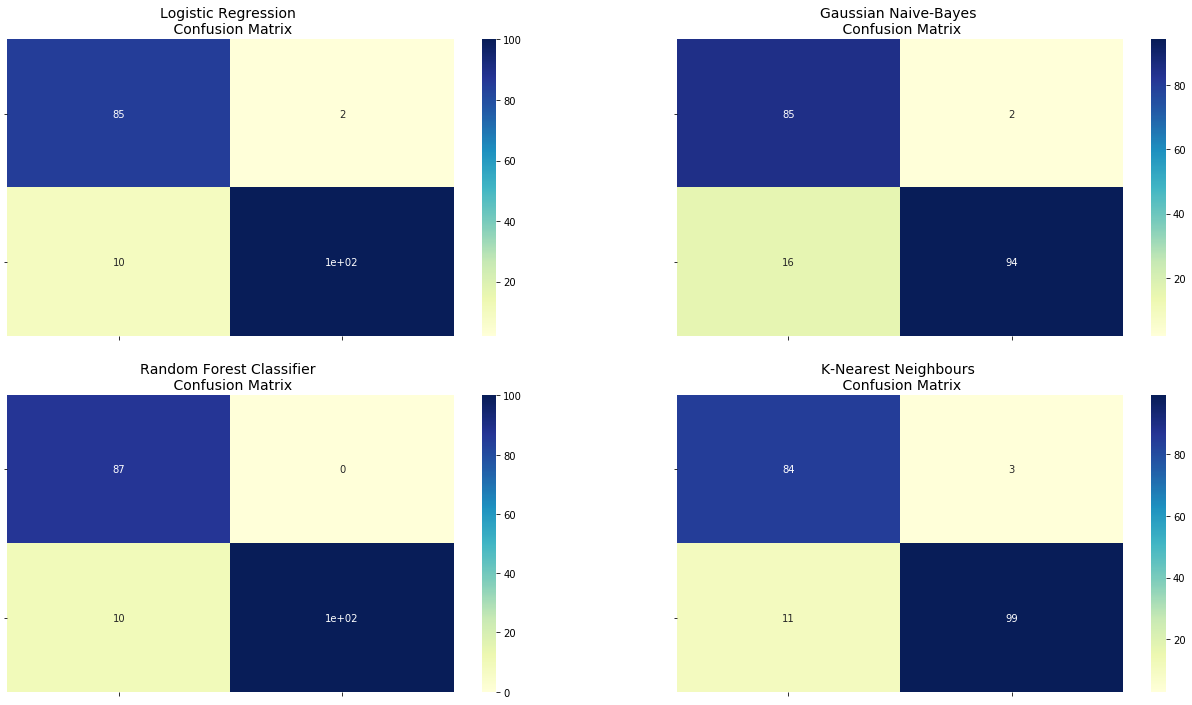

In [18]:
from sklearn.metrics import confusion_matrix

from matplotlib import cm

lr_cm = confusion_matrix(Y_test, lr_y_pred)
gau_cm = confusion_matrix(Y_test, gau_y_pred)
rfc_cm = confusion_matrix(Y_test, rfc_y_pred)
knn_cm = confusion_matrix(Y_test, knn_y_pred)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(lr_cm , ax=ax[0][0], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(gau_cm, ax=ax[0][1], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[0][1].set_title("Gaussian Naive-Bayes \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rfc_cm, ax=ax[1][0], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knn_cm, ax=ax[1][1], annot=True, cmap=plt.cm.get_cmap('YlGnBu'))
ax[1][1].set_title("K-Nearest Neighbours \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [39]:
#Grid search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
clf = GridSearchCV(knn, param_grid=parameters)
clf.fit(X_train,Y_train)
clf.best_params_





{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5}

We've been trying to optimize the result, since there's no amemlioration on the relative metrics of evaluation.

In [46]:
#KNearest Neighbours with gridsearch
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size = 1, n_jobs =  -1)
knn.fit(X_train,Y_train)

knn_y_pred = knn.predict(X_test)

knn_acc=accuracy_score(Y_test,knn_y_pred)
print(f'The accuracy is {(knn_acc)}')
knn_roc_auc=roc_auc_score(Y_test,knn_y_pred)
print(f'The ROC-AUC score is {(knn_roc_auc)}')
knn_prec= precision_score(Y_test,knn_y_pred)
print(f"The precision is {(knn_prec)}")
knn_rec= recall_score(Y_test,knn_y_pred)
print(f"The recall is {(knn_rec)}")
knn_f1= f1_score(Y_test,knn_y_pred)
print(f"The F1-Score is {(knn_f1)}")
knn_MCC=matthews_corrcoef(Y_test,knn_y_pred)
print(f"The Matthews correlation coefficient is {(knn_MCC)}")


The accuracy is 0.9289340101522843
The ROC-AUC score is 0.9327586206896551
The precision is 0.9705882352941176
The recall is 0.9
The F1-Score is 0.9339622641509434
The Matthews correlation coefficient is 0.8601413058812242
